In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/amazon_delivery.csv')

In [3]:
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [6]:
df.shape

(43739, 16)

FEATURE ENGINEERING

- Creating a new feature that can help us find the distance between Store and Delivery

In [7]:
#Creating a function to calculate the distance
from math import radians,sin,cos,atan2,sqrt

def Haversine_distance(lat1,lon1,lat2,lon2):
    R=6371

    dlat=radians(lat2-lat1)
    dlon=radians(lon2-lon1)

    a=sin(dlat/2)**2 + cos(radians(lat1))*cos(radians(lat2))*sin(dlon/2)**2
    c=2*atan2(sqrt(a),sqrt(1-a))
    distance=R*c

    return distance

#Applying this into Dataframe
df['Distance_km']=df.apply(lambda row: Haversine_distance(row['Store_Latitude'],row['Store_Longitude'],row['Drop_Latitude'],row['Drop_Longitude']),axis=1)

In [8]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
Distance_km         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
Distance_km        0
dtype: int64

In [11]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Order_Year']=df['Order_Date'].dt.year
df['Order_Month']=df['Order_Date'].dt.month
df['Order_Day']=df['Order_Date'].dt.day
df['day_of_week'] = df['Order_Date'].dt.day_name()


In [12]:
df['Order_Time']=pd.to_datetime(df['Order_Time'])
df['Order_Hour']=df['Order_Time'].dt.hour
df['Order_Minute']=df['Order_Time'].dt.minute
df['Order_Second']=df['Order_Time'].dt.second

C:\Users\Asus\AppData\Local\Temp\ipykernel_7384\1171618994.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time']=pd.to_datetime(df['Order_Time'])


In [13]:
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['order_part_of_day'] = df['Order_Hour'].apply(get_part_of_day)

In [14]:
df['Pickup_Time']=pd.to_datetime(df['Pickup_Time'])
df['Pickup_Hour']=df['Pickup_Time'].dt.hour
df['Pickup_Minute']=df['Pickup_Time'].dt.minute
df['Pickup_Second']=df['Pickup_Time'].dt.second

C:\Users\Asus\AppData\Local\Temp\ipykernel_7384\4008399179.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time']=pd.to_datetime(df['Pickup_Time'])


In [15]:
df.drop(columns={'Order_Date','Order_Time','Pickup_Time','Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','Order_Second','Order_ID','Pickup_Second'},inplace=True)

In [16]:
order_total_hours=df['Order_Hour']+(df['Order_Minute']/60)
pickup_total_hour=df['Pickup_Hour']+(df['Pickup_Minute']/60)

df['Total_preparation_time']=pickup_total_hour-order_total_hours

df.loc[df['Total_preparation_time']<0,'Total_preparation_time']+=24
print(df[['Order_Hour', 'Pickup_Hour', 'Total_preparation_time']].head())

   Order_Hour  Pickup_Hour  Total_preparation_time
0          11           11                0.250000
1          19           19                0.083333
2           8            8                0.250000
3          18           18                0.166667
4          13           13                0.250000


In [17]:
df['Delivery_Time_hour']=(df['Delivery_Time']/60)
df['Delivery_Time_hour']

0        2.000000
1        2.750000
2        2.166667
3        1.750000
4        2.500000
           ...   
43734    2.666667
43735    3.000000
43736    1.333333
43737    2.166667
43738    3.000000
Name: Delivery_Time_hour, Length: 43594, dtype: float64

In [18]:
df.drop(columns='Delivery_Time',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Agent_Age               43594 non-null  int64  
 1   Agent_Rating            43594 non-null  float64
 2   Weather                 43594 non-null  object 
 3   Traffic                 43594 non-null  object 
 4   Vehicle                 43594 non-null  object 
 5   Area                    43594 non-null  object 
 6   Category                43594 non-null  object 
 7   Distance_km             43594 non-null  float64
 8   Order_Year              43594 non-null  int32  
 9   Order_Month             43594 non-null  int32  
 10  Order_Day               43594 non-null  int32  
 11  day_of_week             43594 non-null  object 
 12  Order_Hour              43594 non-null  int32  
 13  Order_Minute            43594 non-null  int32  
 14  order_part_of_day       43594 non-null  obj

In [20]:
cat=[]
num=[]
for col in df.columns:
    if df[col].dtype=='O':
        cat.append(col)
    else:
        num.append(col)

print(f'The Categorical columns are{cat}')
print(f'The numerical columns are {num}')

The Categorical columns are['Weather', 'Traffic', 'Vehicle', 'Area', 'Category', 'day_of_week', 'order_part_of_day']
The numerical columns are ['Agent_Age', 'Agent_Rating', 'Distance_km', 'Order_Year', 'Order_Month', 'Order_Day', 'Order_Hour', 'Order_Minute', 'Pickup_Hour', 'Pickup_Minute', 'Total_preparation_time', 'Delivery_Time_hour']


In [21]:
for col in cat:
    value_counts=df[col].value_counts()
    unique=df[col].nunique()
    Total_unique=df[col].unique()
    print(f'---The value counts are{unique}')
    print(f"Value Counts (Total Unique: {len(value_counts)})")
    print(value_counts)
    print("\n" + "="*40 + "\n")

---The value counts are6
Value Counts (Total Unique: 6)
Weather
Fog           7435
Stormy        7366
Cloudy        7277
Sandstorms    7238
Windy         7211
Sunny         7067
Name: count, dtype: int64


---The value counts are4
Value Counts (Total Unique: 4)
Traffic
Low        14976
Jam        13710
Medium     10614
High        4294
Name: count, dtype: int64


---The value counts are3
Value Counts (Total Unique: 3)
Vehicle
motorcycle     25486
scooter        14590
van             3518
Name: count, dtype: int64


---The value counts are4
Value Counts (Total Unique: 4)
Area
Metropolitian     32592
Urban              9715
Other              1135
Semi-Urban          152
Name: count, dtype: int64


---The value counts are16
Value Counts (Total Unique: 16)
Category
Electronics     2841
Books           2813
Jewelry         2793
Toys            2771
Skincare        2764
Snacks          2762
Outdoors        2739
Apparel         2718
Sports          2708
Grocery         2687
Pet Supplies    2

In [22]:
for col in num:
    value_counts=df[col].value_counts()
    unique=df[col].nunique()
    Total_unique=df[col].unique()
    print(f'---The value counts are{unique}')
    print(f"Value Counts (Total Unique: {len(value_counts)})")
    print(value_counts)
    print("\n" + "="*40 + "\n")

---The value counts are20
Value Counts (Total Unique: 20)
Agent_Age
35    2258
36    2256
37    2224
30    2222
38    2216
24    2207
32    2200
22    2193
29    2190
33    2184
28    2176
25    2172
34    2165
26    2157
21    2152
27    2149
39    2142
20    2128
31    2119
23    2084
Name: count, dtype: int64


---The value counts are26
Value Counts (Total Unique: 26)
Agent_Rating
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
3.4      32
3.1      29
3.2      29
3.3      25
2.7      22
2.6      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64


---The value counts are4509
Value Counts (Total Unique: 4509)
Distance_km
20.442930      327
14.152801      324
6.290135       321
9.435202       320
11.007735      319
              ... 
4.579039         1
1.488324         1
4423.276011      1
10.594893        1
5895.0194

In [23]:
df.describe()

,Agent_Age,Agent_Rating,Distance_km,Order_Year,Order_Month,Order_Day,Order_Hour,Order_Minute,Pickup_Hour,Pickup_Minute,Total_preparation_time,Delivery_Time_hour
count,43594.000000,43594.000000,43594.000000,43594.0,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,26.756143,2022.0,2.981052,13.811763,17.424737,29.547529,17.152498,28.621485,0.166518,2.081941
std,5.760689,0.313827,299.640228,0.0,0.545886,8.712240,4.818828,16.611268,5.319094,17.557371,0.068109,0.865700
min,20.000000,2.500000,1.465067,2022.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.166667
25%,25.000000,4.500000,4.663432,2022.0,3.000000,6.000000,15.000000,15.000000,14.000000,15.000000,0.083333,1.500000
50%,30.000000,4.700000,9.220419,2022.0,3.000000,13.000000,19.000000,30.000000,19.000000,30.000000,0.166667,2.083333
75%,35.000000,4.900000,13.682165,2022.0,3.000000,20.000000,21.000000,45.000000,21.000000,45.000000,0.250000,2.666667
max,39.000000,5.000000,6884.726399,2022.0,4.000000,31.000000,23.000000,55.000000,23.000000,55.000000,0.250000,4.500000


In [24]:
df.duplicated().sum()

np.int64(0)

EDA


In [25]:
df2=df.copy()

In [26]:
df2

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Category,Distance_km,Order_Year,Order_Month,Order_Day,day_of_week,Order_Hour,Order_Minute,order_part_of_day,Pickup_Hour,Pickup_Minute,Total_preparation_time,Delivery_Time_hour
0,37,4.9,Sunny,High,motorcycle,Urban,Clothing,3.025149,2022,3,19,Saturday,11,30,Morning,11,45,0.250000,2.000000
1,34,4.5,Stormy,Jam,scooter,Metropolitian,Electronics,20.183530,2022,3,25,Friday,19,45,Evening,19,50,0.083333,2.750000
2,23,4.4,Sandstorms,Low,motorcycle,Urban,Sports,1.552758,2022,3,19,Saturday,8,30,Morning,8,45,0.250000,2.166667
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,Cosmetics,7.790401,2022,4,5,Tuesday,18,0,Evening,18,10,0.166667,1.750000
4,32,4.6,Cloudy,High,scooter,Metropolitian,Toys,6.210138,2022,3,26,Saturday,13,30,Afternoon,13,45,0.250000,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,30,4.8,Windy,High,motorcycle,Metropolitian,Home,1.489846,2022,3,24,Thursday,11,35,Morning,11,45,0.166667,2.666667
43735,21,4.6,Windy,Jam,motorcycle,Metropolitian,Jewelry,11.007735,2022,2,16,Wednesday,19,55,Evening,20,10,0.250000,3.000000
43736,30,4.9,Cloudy,Low,scooter,Metropolitian,Home,4.657195,2022,3,11,Friday,23,50,Night,0,5,0.250000,1.333333
43737,20,4.7,Cloudy,High,motorcycle,Metropolitian,Kitchen,6.232393,2022,3,7,Monday,13,35,Afternoon,13,40,0.083333,2.166667


- Which Delivery takes how much Delivery time

In [27]:
average_delivery_time_by_category=df2.groupby('Category')['Delivery_Time_hour'].mean().reset_index()
average_delivery_time_by_category.sort_values(by='Delivery_Time_hour',ascending=False)

,Category,Delivery_Time_hour
3,Cosmetics,2.215585
8,Kitchen,2.206002
14,Sports,2.205164
12,Skincare,2.201640
0,Apparel,2.200025
13,Snacks,2.198528
10,Pet Supplies,2.189188
11,Shoes,2.185907
9,Outdoors,2.185895
1,Books,2.184382


In [28]:
average_delivery_time_by_Agent_age=df2.groupby('Agent_Age')['Delivery_Time_hour'].agg(['mean','median']).reset_index()
average_delivery_time_by_Agent_age.sort_values(by='mean',ascending=False)

,Agent_Age,mean,median
12,32,2.383500,2.333333
11,31,2.359375,2.333333
13,33,2.347970,2.333333
19,39,2.345448,2.333333
16,36,2.345368,2.333333
14,34,2.340200,2.333333
18,38,2.325812,2.333333
15,35,2.324092,2.333333
17,37,2.313841,2.333333
10,30,2.299977,2.250000


In [29]:
average_time_by_vehicle=df2.groupby('Vehicle')['Delivery_Time_hour'].mean().reset_index()
average_time_by_vehicle.sort_values(by='Delivery_Time_hour',ascending=False)

,Vehicle,Delivery_Time_hour
0,motorcycle,2.183803
1,scooter,1.939275
2,van,1.935674


In [30]:
average_delivery_time=df2.groupby(['Weather','Traffic'])['Delivery_Time_hour'].agg(['mean','median']).reset_index()
average_delivery_time.sort_values(by='mean',ascending=False)

,Weather,Traffic,mean,median
1,Cloudy,Jam,2.911381,3.000000
5,Fog,Jam,2.902707,3.000000
21,Windy,Jam,2.381113,2.416667
9,Sandstorms,Jam,2.371404,2.416667
13,Stormy,Jam,2.371162,2.333333
0,Cloudy,High,2.315014,2.333333
3,Cloudy,Medium,2.278012,2.416667
4,Fog,High,2.248921,2.333333
11,Sandstorms,Medium,2.213638,2.250000
7,Fog,Medium,2.203728,2.333333


In [31]:
Time_of_Delivery_acc_to_order_date=df2.groupby(['Order_Year','Order_Month','Order_Day'])['Delivery_Time_hour'].mean().reset_index()
Time_of_Delivery_acc_to_order_date.sort_values(by='Delivery_Time_hour',ascending=False)

,Order_Year,Order_Month,Order_Day,Delivery_Time_hour
21,2022,3,14,2.402455
25,2022,3,18,2.401976
35,2022,3,29,2.398896
1,2022,2,12,2.397794
27,2022,3,20,2.395590
3,2022,2,14,2.386271
17,2022,3,10,2.386237
39,2022,4,2,2.382042
23,2022,3,16,2.379709
29,2022,3,23,2.377144


In [32]:
Time_of_Delivery_acc_to_order_time=df2.groupby(['Order_Hour','Order_Minute'])['Delivery_Time_hour'].mean().reset_index()
Time_of_Delivery_acc_to_order_time.sort_values(by='Delivery_Time_hour',ascending=False)

,Order_Hour,Order_Minute,Delivery_Time_hour
129,19,45,2.564214
142,20,55,2.548481
138,20,35,2.528006
124,19,20,2.515829
148,21,30,2.511843
...,...,...,...
7,8,40,1.504630
8,8,45,1.494890
32,10,55,1.493064
19,9,45,1.471486


In [33]:
Time_of_Delivery_acc_to_pickup_time=df2.groupby(['Pickup_Hour','Pickup_Minute'])['Delivery_Time_hour'].mean().reset_index()
Time_of_Delivery_acc_to_pickup_time.sort_values(by='Delivery_Time_hour',ascending=False)

,Pickup_Hour,Pickup_Minute,Delivery_Time_hour
159,21,10,2.576245
157,21,0,2.540171
164,21,35,2.523474
148,20,15,2.522378
152,20,35,2.503157
...,...,...,...
17,9,20,1.496981
29,10,20,1.489048
21,9,40,1.488542
12,8,55,1.448551


In [34]:
Vehicle_traffic=df2.groupby(['Vehicle','Traffic'])['Delivery_Time_hour'].mean().reset_index()
Vehicle_traffic.sort_values(by='Delivery_Time_hour',ascending=False)

,Vehicle,Traffic,Delivery_Time_hour
1,motorcycle,Jam,2.593774
5,scooter,Jam,2.291733
0,motorcycle,High,2.282344
9,van,Jam,2.238747
3,motorcycle,Medium,2.217583
8,van,High,2.009221
11,van,Medium,1.987563
4,scooter,High,1.971907
7,scooter,Medium,1.963697
2,motorcycle,Low,1.761759


In [35]:
df2.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Category,Distance_km,Order_Year,Order_Month,Order_Day,day_of_week,Order_Hour,Order_Minute,order_part_of_day,Pickup_Hour,Pickup_Minute,Total_preparation_time,Delivery_Time_hour
0,37,4.9,Sunny,High,motorcycle,Urban,Clothing,3.025149,2022,3,19,Saturday,11,30,Morning,11,45,0.250000,2.000000
1,34,4.5,Stormy,Jam,scooter,Metropolitian,Electronics,20.183530,2022,3,25,Friday,19,45,Evening,19,50,0.083333,2.750000
2,23,4.4,Sandstorms,Low,motorcycle,Urban,Sports,1.552758,2022,3,19,Saturday,8,30,Morning,8,45,0.250000,2.166667
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,Cosmetics,7.790401,2022,4,5,Tuesday,18,0,Evening,18,10,0.166667,1.750000
4,32,4.6,Cloudy,High,scooter,Metropolitian,Toys,6.210138,2022,3,26,Saturday,13,30,Afternoon,13,45,0.250000,2.500000


In [36]:
Delivery_Distance=df2.groupby('Distance_km')['Delivery_Time_hour'].mean().reset_index()
Delivery_Distance.sort_values(by='Delivery_Time_hour',ascending=False)

,Distance_km,Delivery_Time_hour
3686,16.787614,4.500000
3174,13.428917,4.333333
4428,5019.157188,4.250000
3497,16.113654,4.250000
3957,19.396205,4.166667
...,...,...
4491,6754.425359,0.300000
2022,8.987910,0.300000
4388,3462.898707,0.283333
968,4.578869,0.283333


In [37]:
Delivery_Day=df2.groupby(['day_of_week','order_part_of_day'])['Delivery_Time_hour'].mean().reset_index()
Delivery_Day.sort_values(by='Delivery_Time_hour',ascending=False)

,day_of_week,order_part_of_day,Delivery_Time_hour
25,Wednesday,Evening,2.394272
1,Friday,Evening,2.332957
13,Sunday,Evening,2.329535
5,Monday,Evening,2.328109
9,Saturday,Evening,2.305242
21,Tuesday,Evening,2.270286
17,Thursday,Evening,2.193651
27,Wednesday,Night,2.090928
24,Wednesday,Afternoon,2.090808
3,Friday,Night,2.051690


In [38]:
Delivery_Area=df2.groupby(['Area','Category'])['Delivery_Time_hour'].mean().reset_index()
Delivery_Area.sort_values(by='Delivery_Time_hour',ascending=False)

,Area,Category,Delivery_Time_hour
46,Semi-Urban,Sports,4.234848
38,Semi-Urban,Home,4.194444
41,Semi-Urban,Outdoors,4.183333
44,Semi-Urban,Skincare,4.178571
47,Semi-Urban,Toys,4.166667
...,...,...,...
23,Other,Jewelry,1.619518
37,Semi-Urban,Grocery,0.791667
5,Metropolitian,Grocery,0.459318
53,Urban,Grocery,0.387522


- Visualization


In [39]:
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Category,Distance_km,Order_Year,Order_Month,Order_Day,day_of_week,Order_Hour,Order_Minute,order_part_of_day,Pickup_Hour,Pickup_Minute,Total_preparation_time,Delivery_Time_hour
0,37,4.9,Sunny,High,motorcycle,Urban,Clothing,3.025149,2022,3,19,Saturday,11,30,Morning,11,45,0.250000,2.000000
1,34,4.5,Stormy,Jam,scooter,Metropolitian,Electronics,20.183530,2022,3,25,Friday,19,45,Evening,19,50,0.083333,2.750000
2,23,4.4,Sandstorms,Low,motorcycle,Urban,Sports,1.552758,2022,3,19,Saturday,8,30,Morning,8,45,0.250000,2.166667
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,Cosmetics,7.790401,2022,4,5,Tuesday,18,0,Evening,18,10,0.166667,1.750000
4,32,4.6,Cloudy,High,scooter,Metropolitian,Toys,6.210138,2022,3,26,Saturday,13,30,Afternoon,13,45,0.250000,2.500000


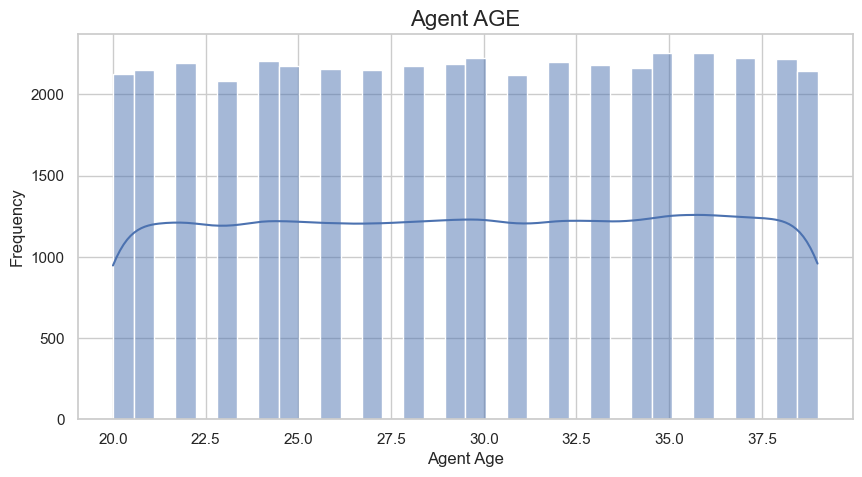

In [40]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
sns.histplot(df['Agent_Age'],kde=True)
plt.title('Agent AGE', fontsize=16)
plt.xlabel('Agent Age')
plt.ylabel('Frequency')
plt.show()

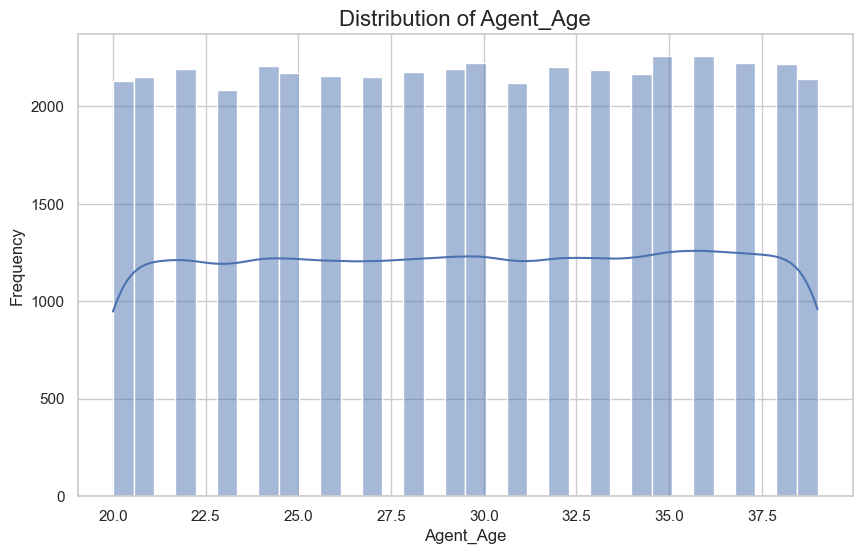

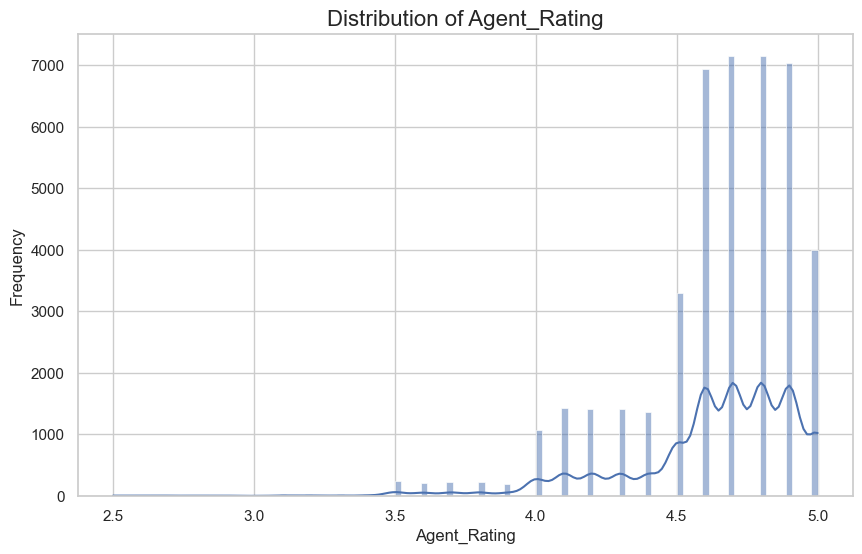

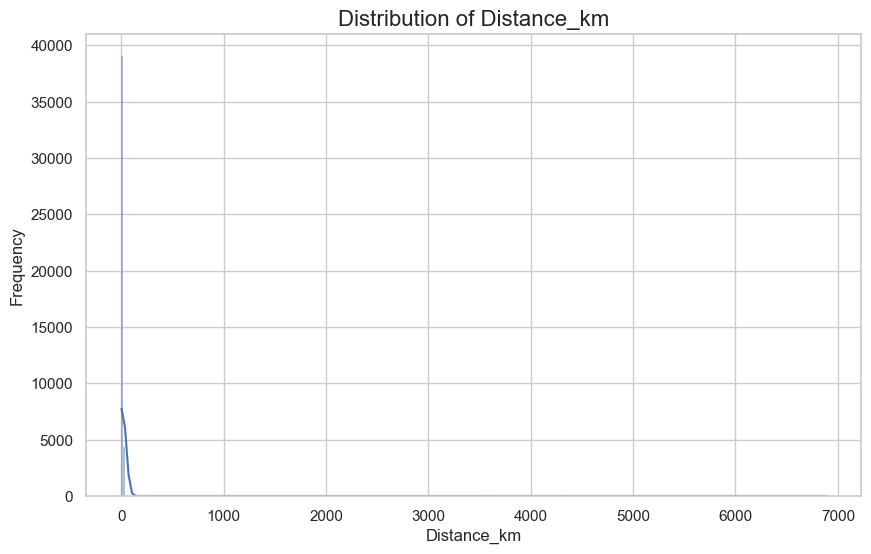

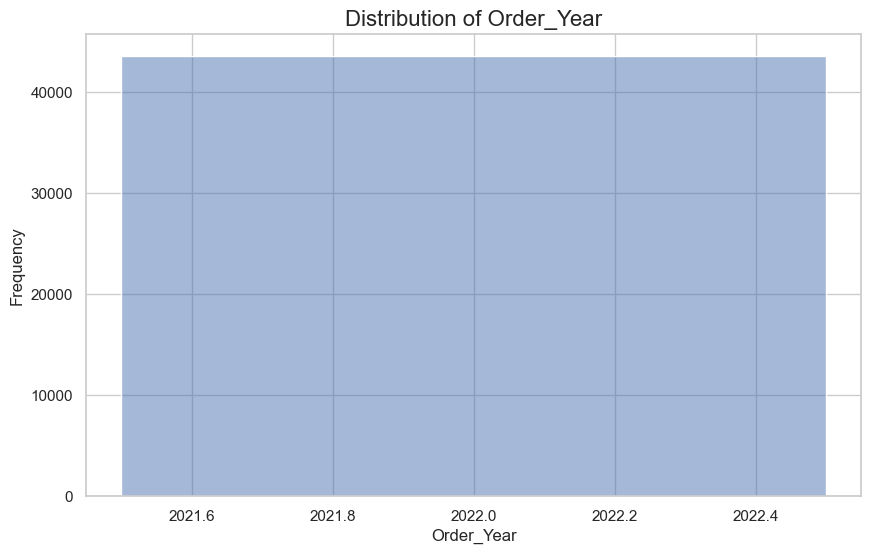

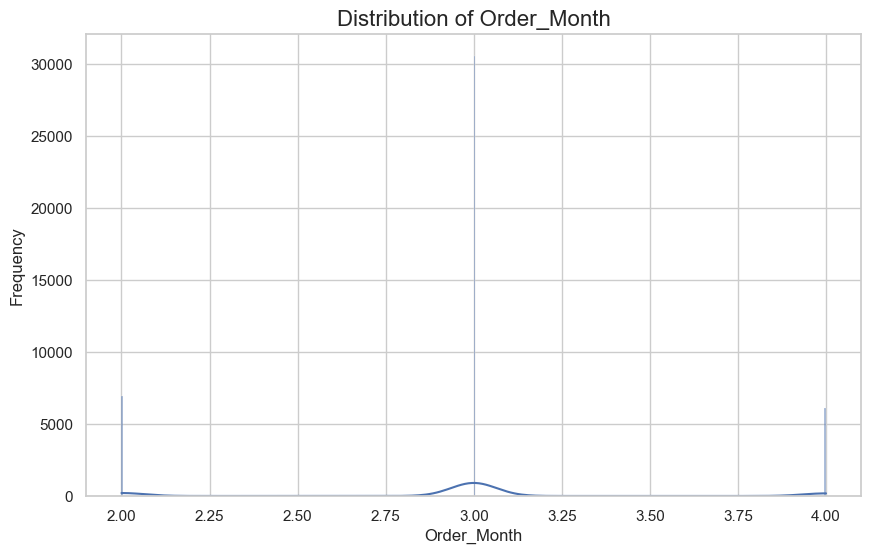

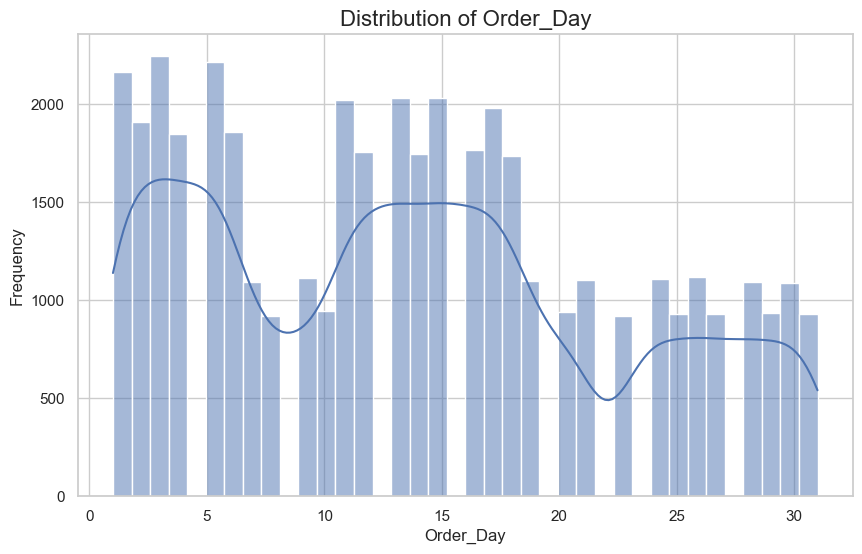

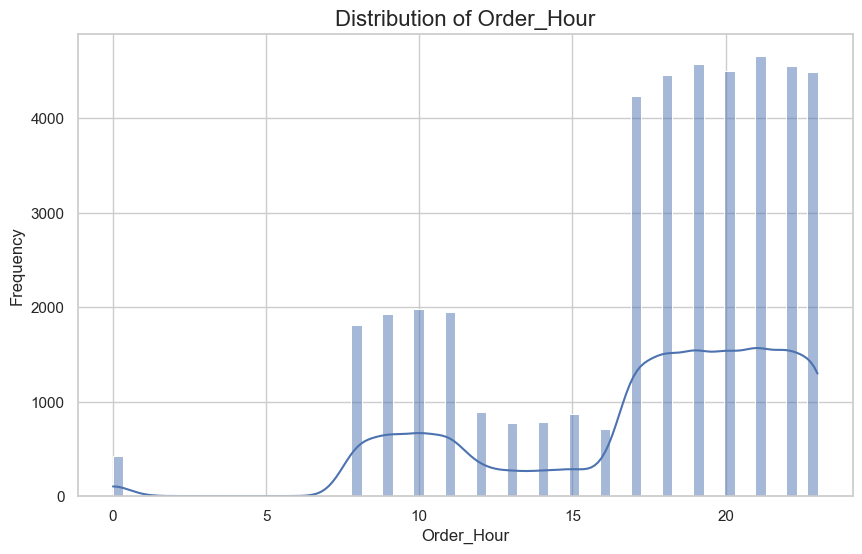

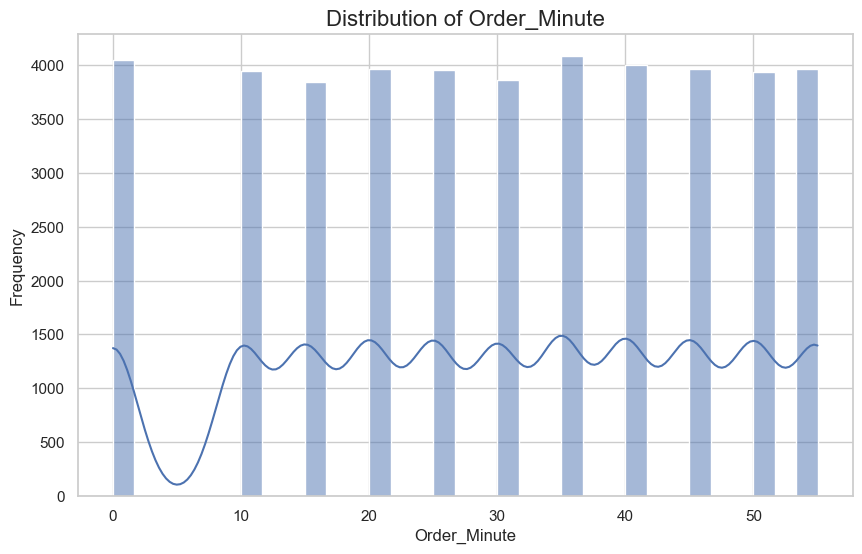

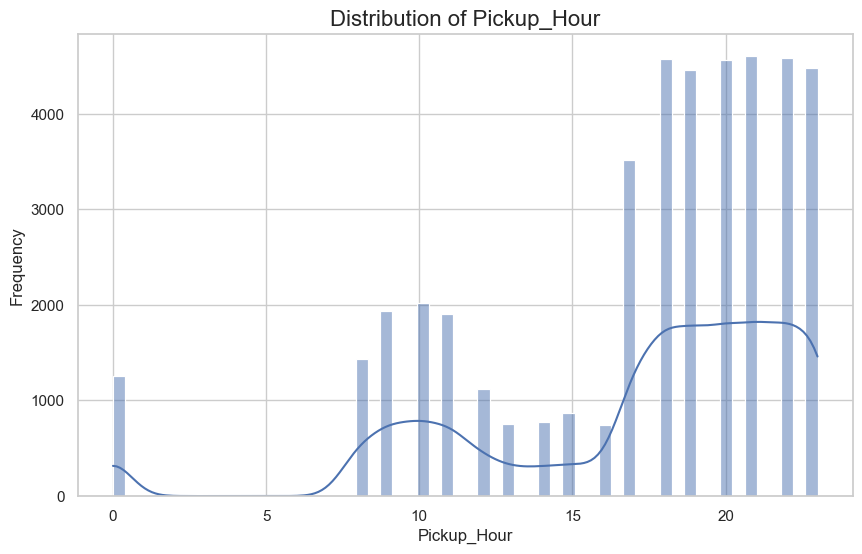

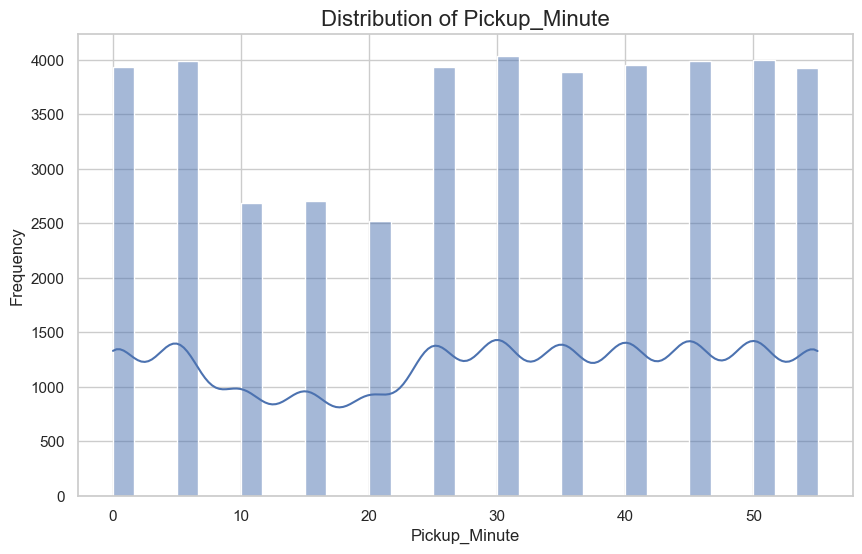

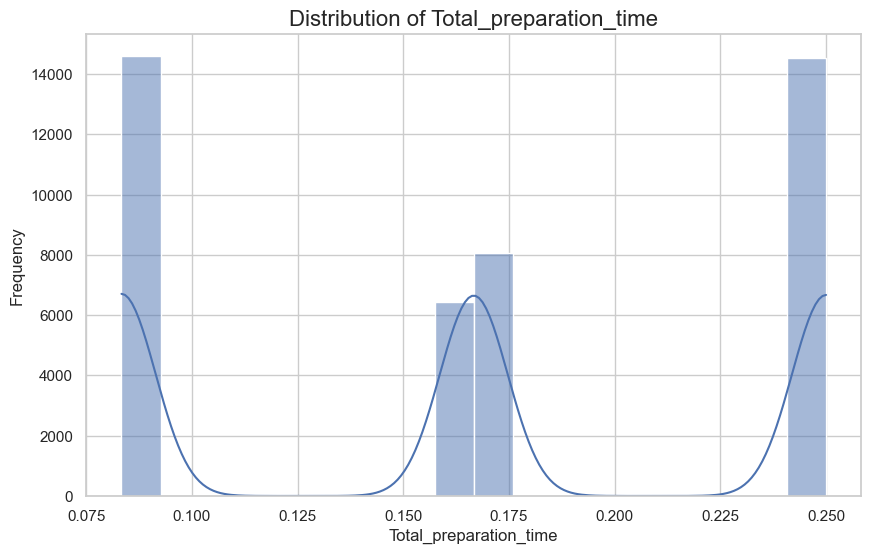

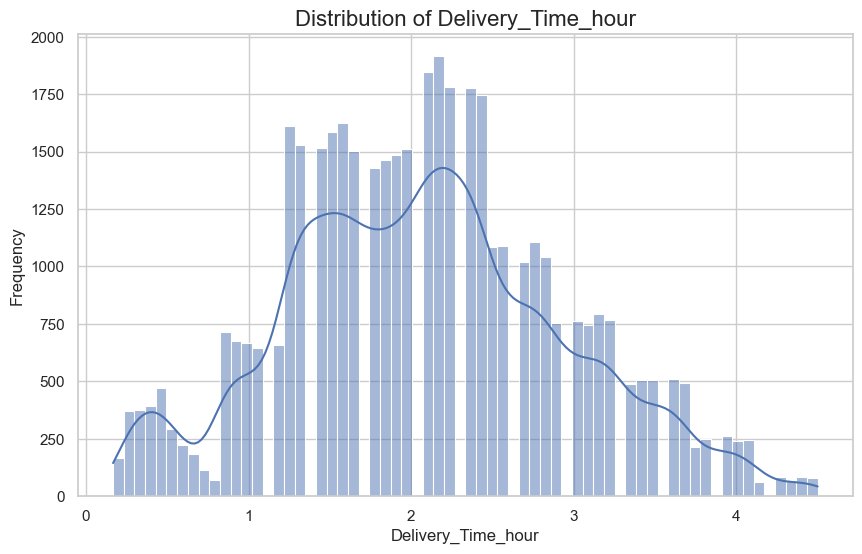

In [41]:
sns.set_theme(style='whitegrid')
for col in num:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}',fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


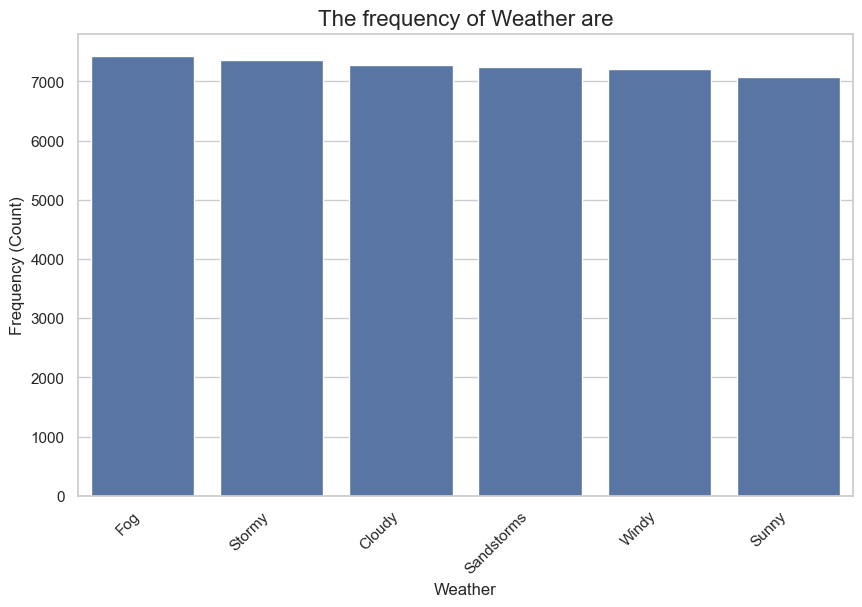

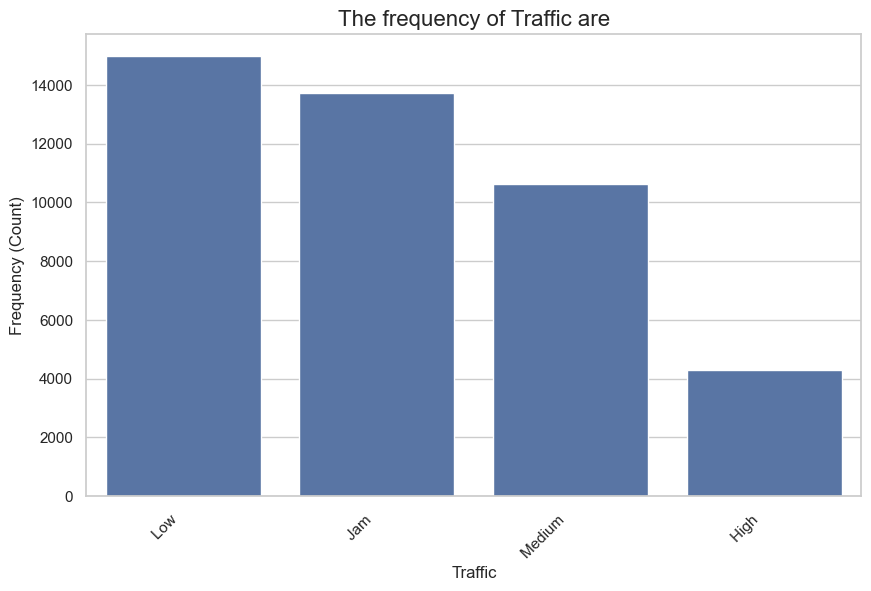

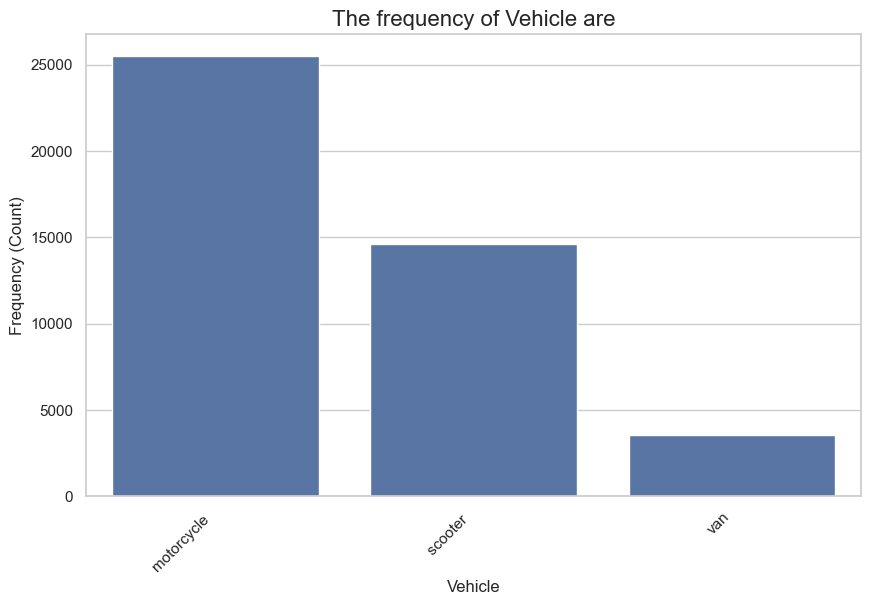

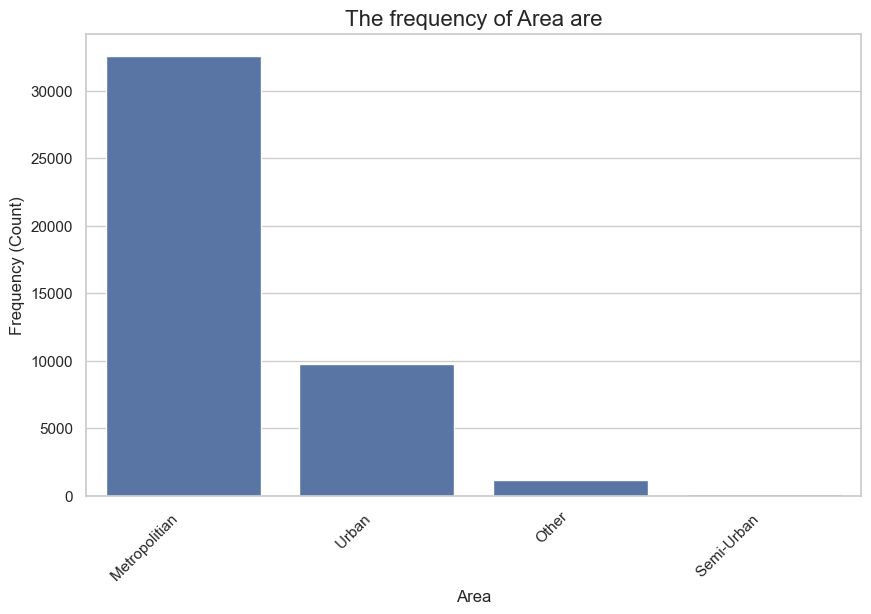

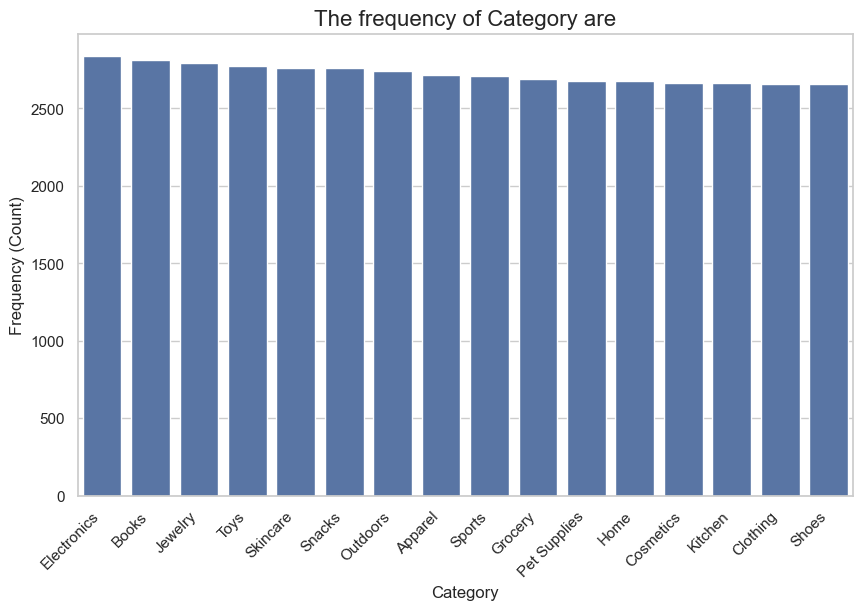

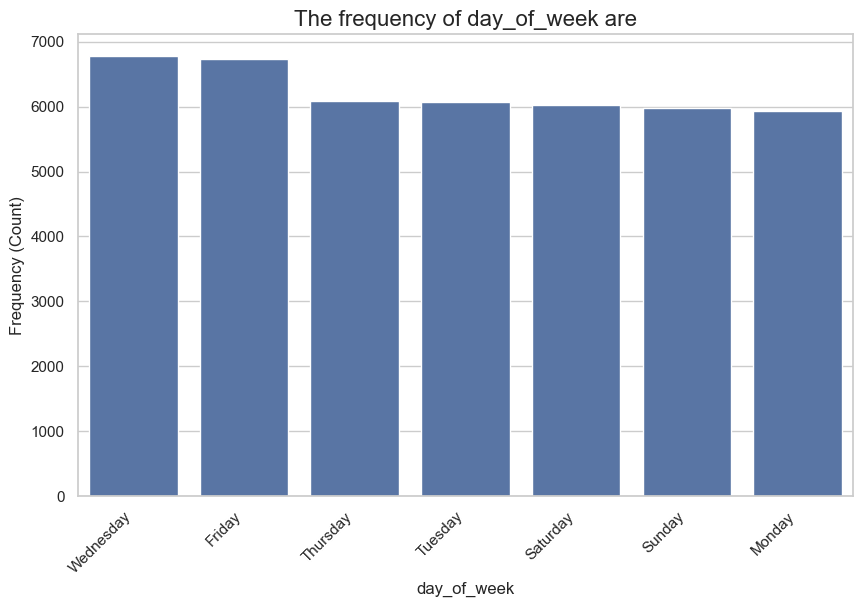

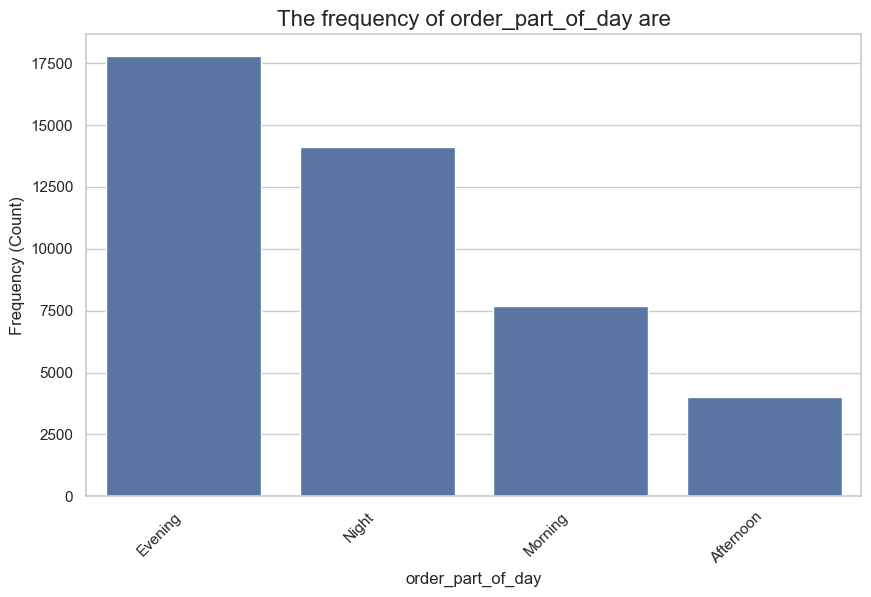

In [42]:
sns.set_theme(style='whitegrid')
for column in cat:
    if column!='Order_ID':
        plt.figure(figsize=(10,6))
        sns.countplot(data=df,x=column,order=df[column].value_counts().index)
        plt.title(f'The frequency of {column} are',fontsize=16)
        plt.xlabel(column)
        plt.ylabel('Frequency (Count)')
        plt.xticks(rotation=45,ha='right')
        plt.show()
    

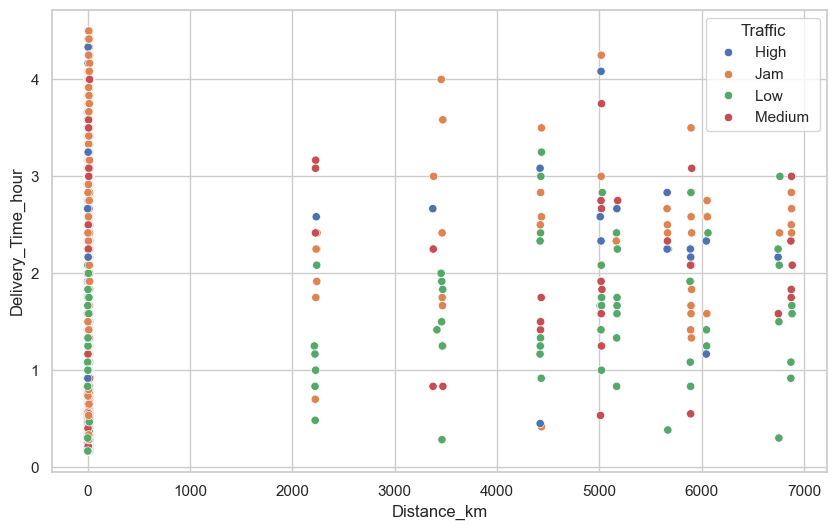

In [43]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Distance_km',y='Delivery_Time_hour',hue='Traffic')
plt.show()


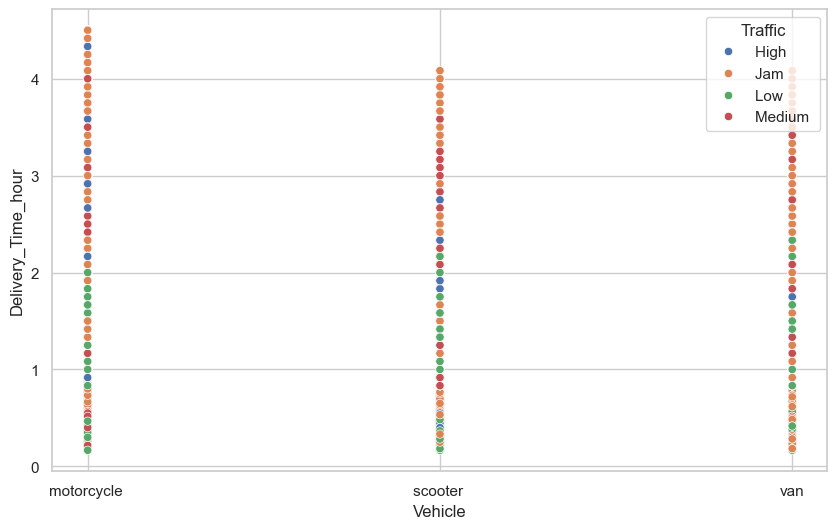

In [44]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Vehicle',y='Delivery_Time_hour',hue='Traffic')
plt.show()


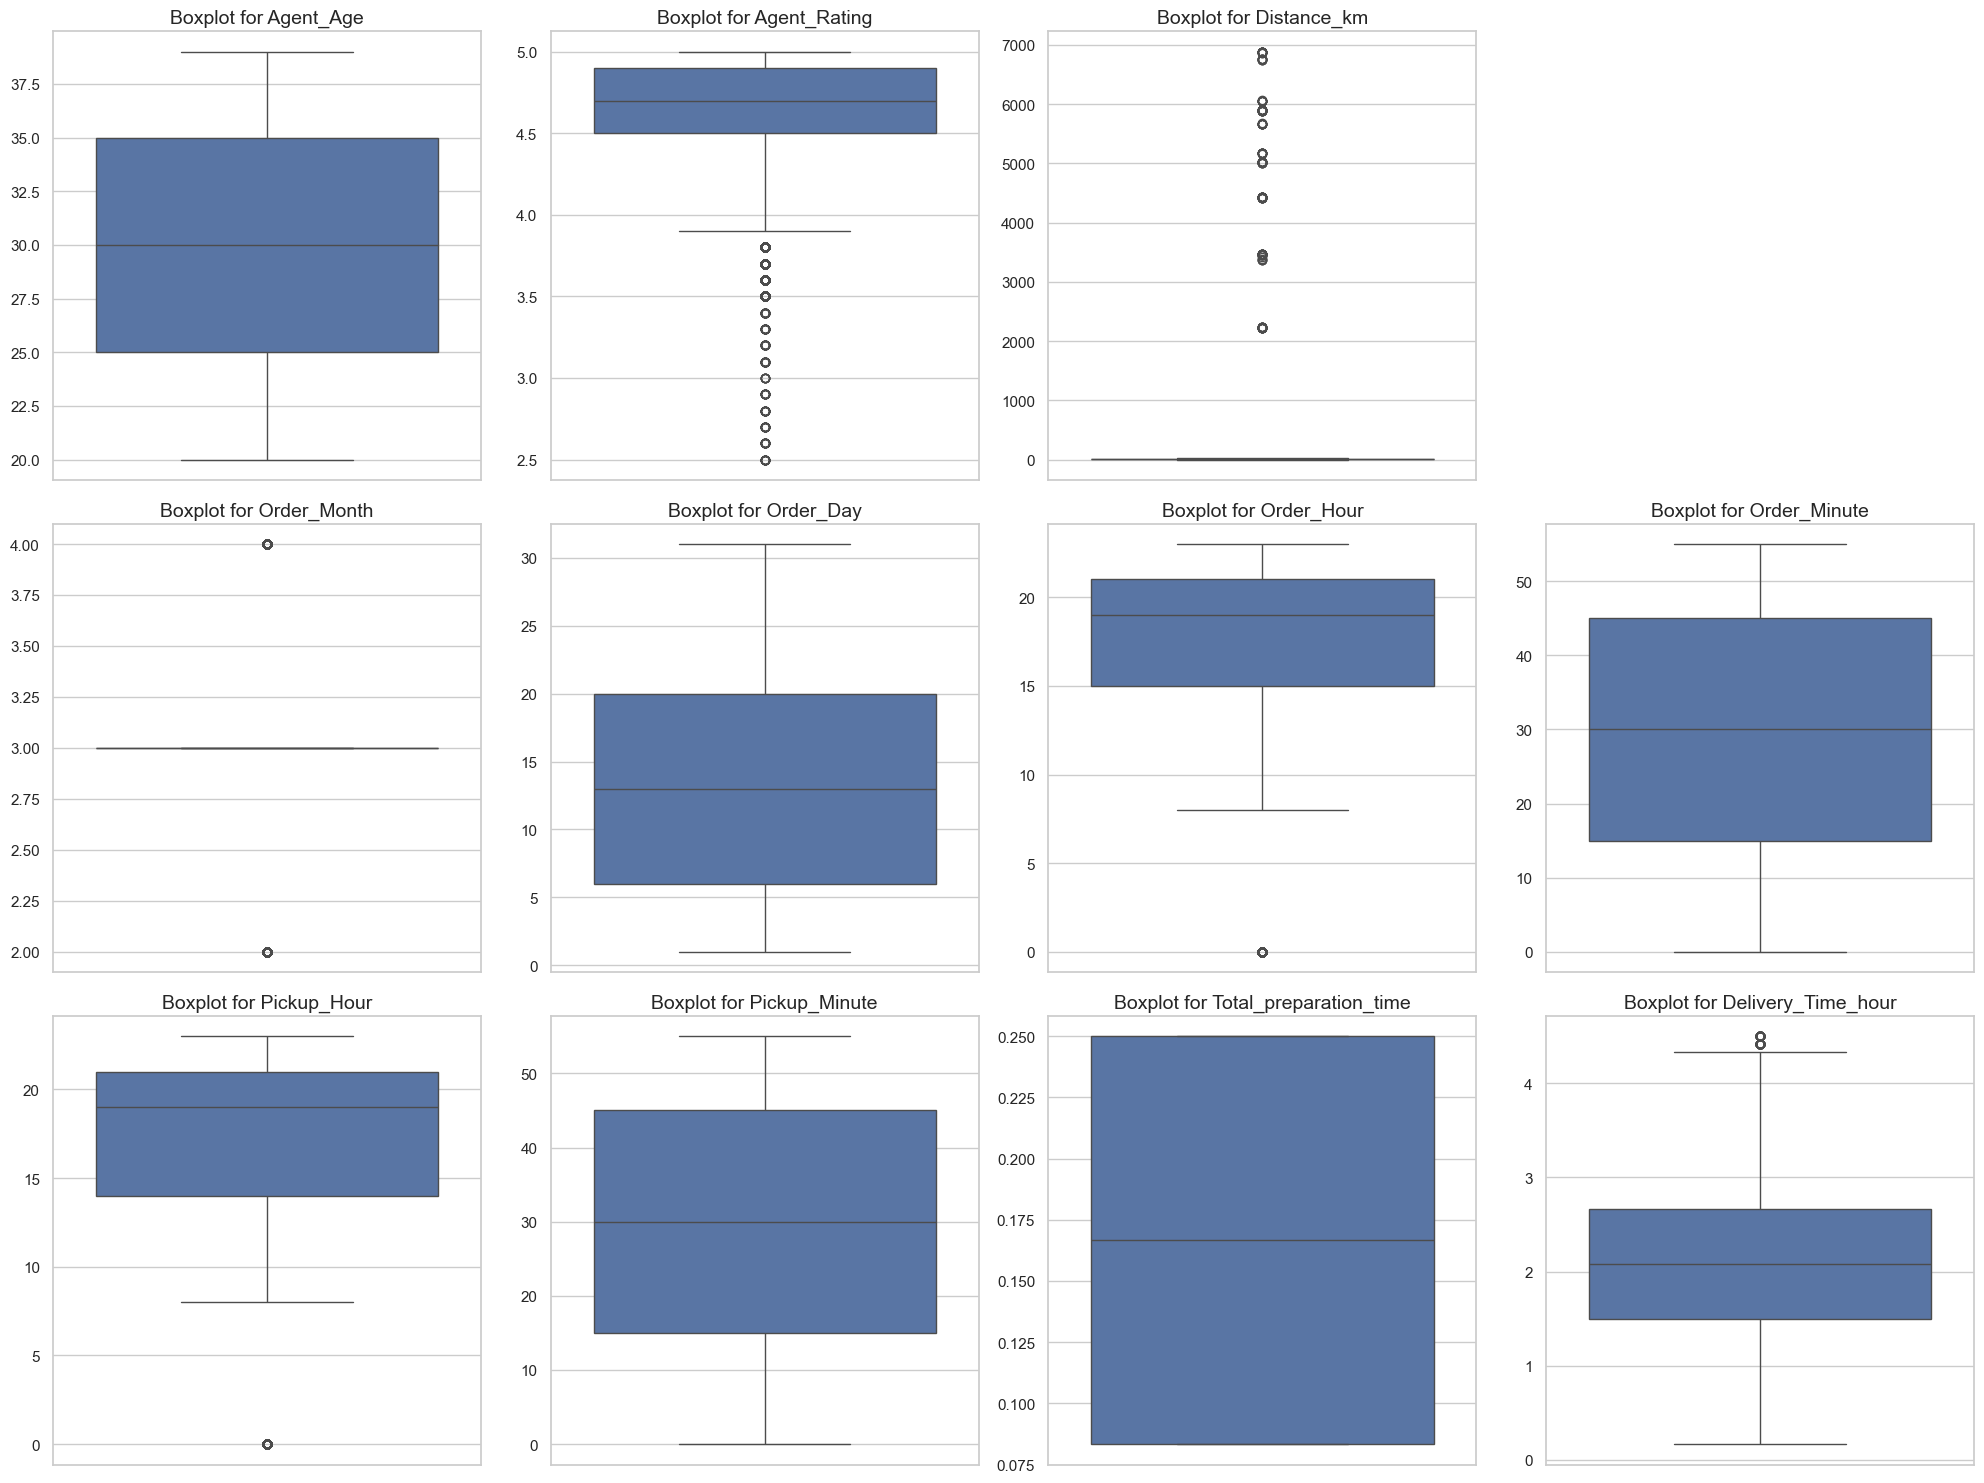

In [45]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num):
    # 'Order_Year' only has one value (2022), so a boxplot isn't useful. We'll skip it.
    if col != 'Order_Year':
        plt.subplot(3, 4, i + 1)  # Create a 3x4 grid of plots
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot for {col}', fontsize=14)
        plt.ylabel('') # Remove y-axis label to keep it clean

plt.tight_layout()
plt.show()

In [46]:
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))
    return df

df_capped = cap_outliers(df, ['Distance_km'])


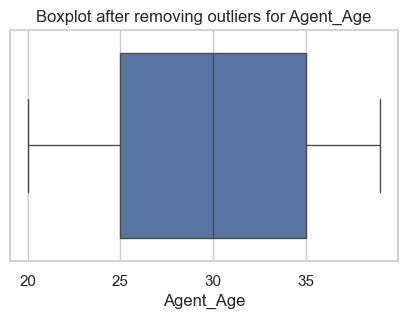

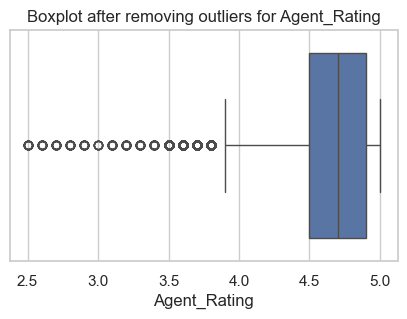

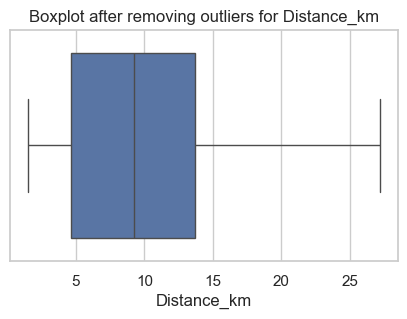

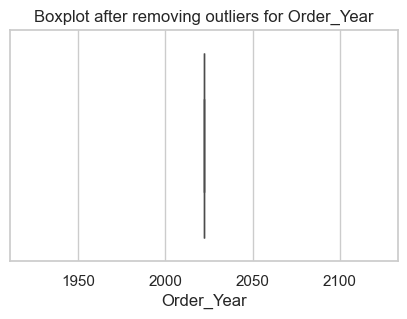

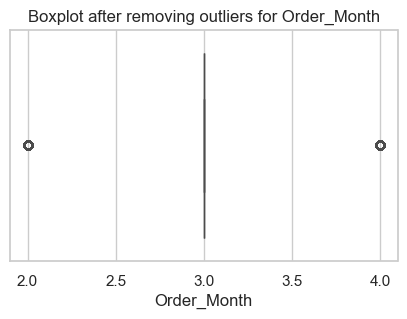

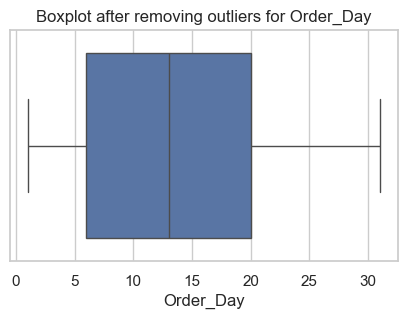

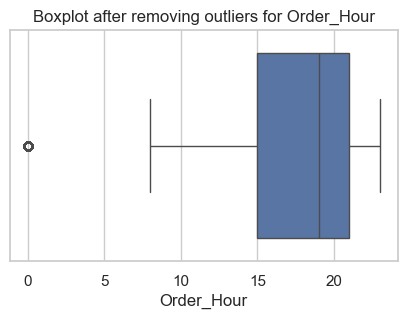

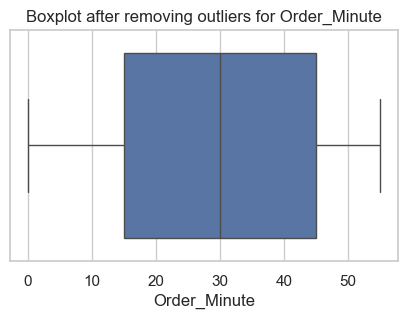

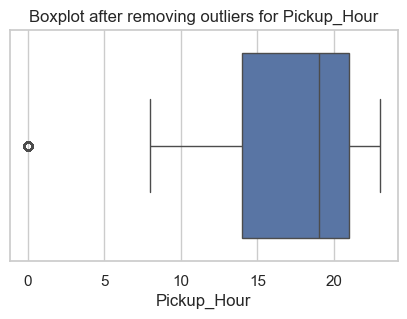

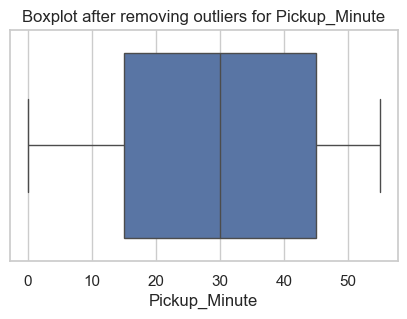

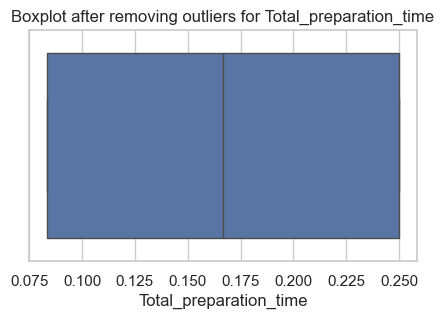

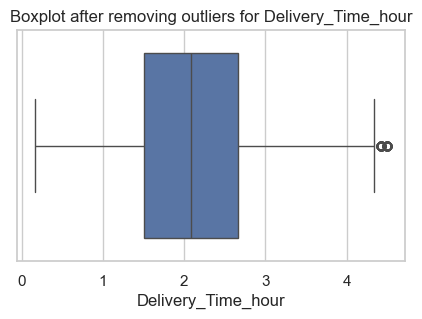

In [47]:
for col in num:  # your numeric columns list
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df_capped, x=col)
    plt.title(f'Boxplot after removing outliers for {col}')
    plt.show()


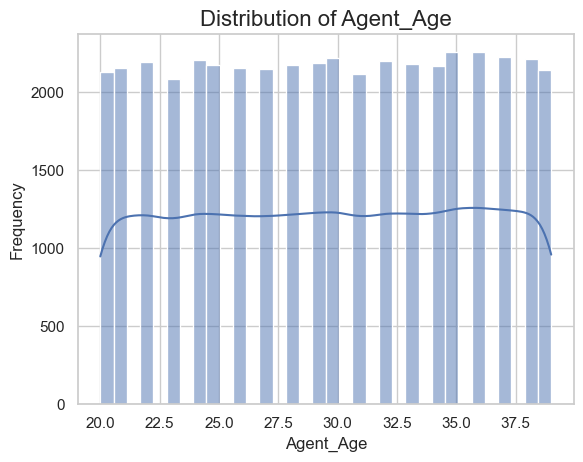

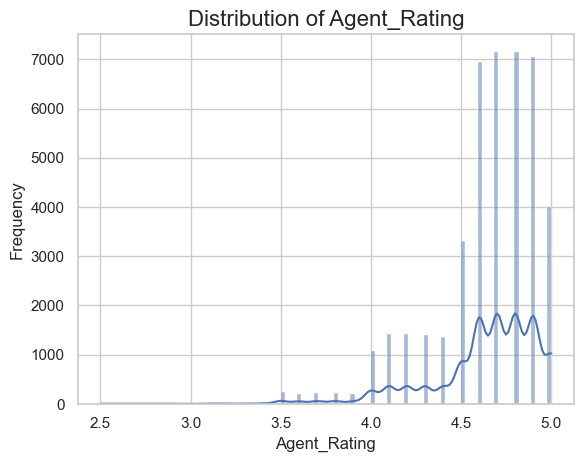

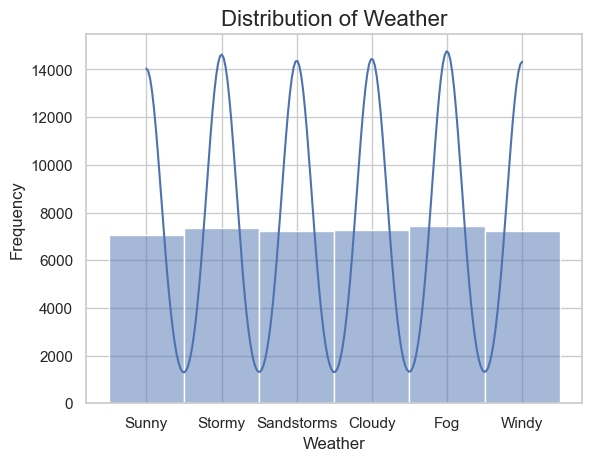

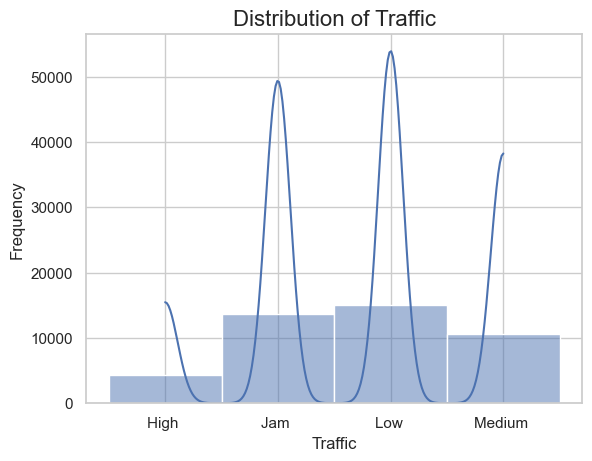

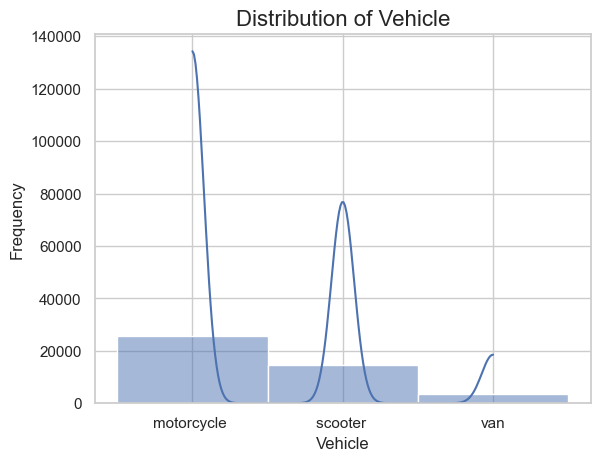

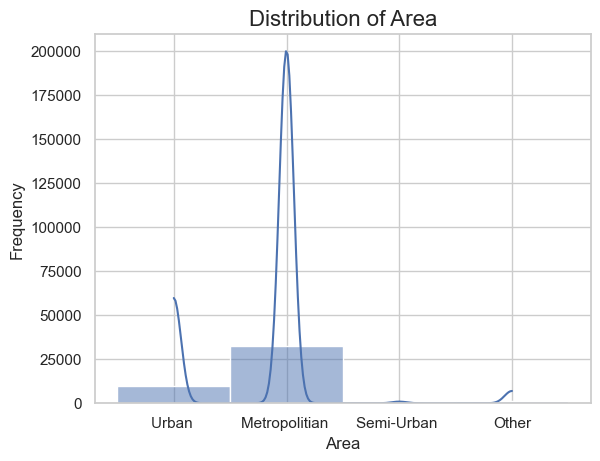

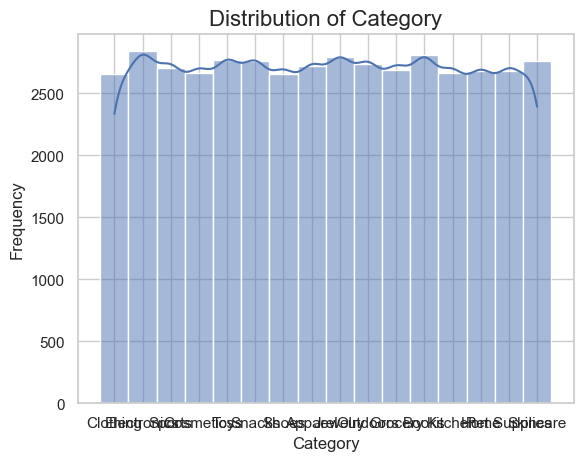

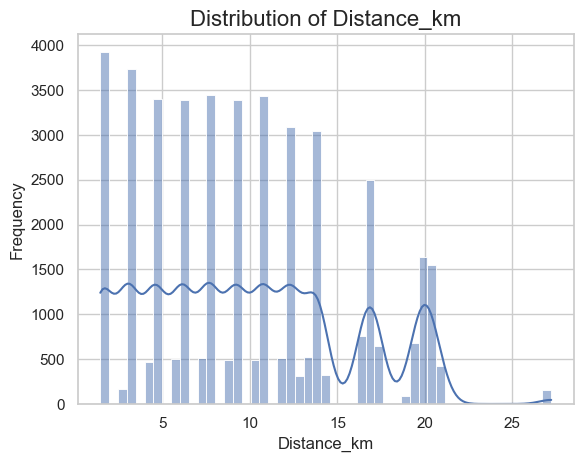

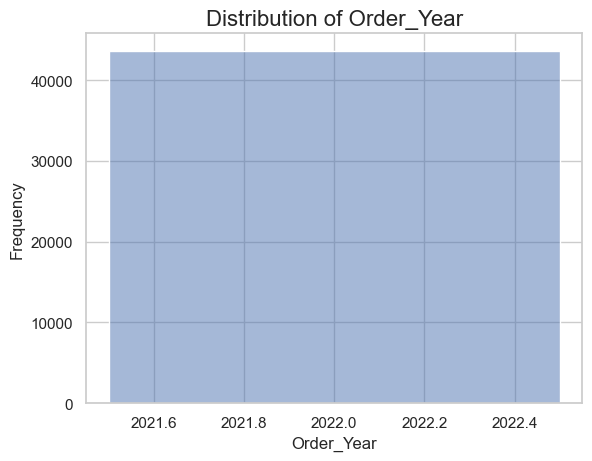

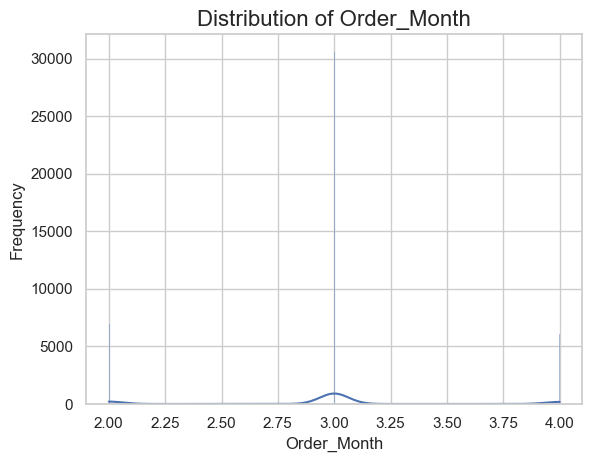

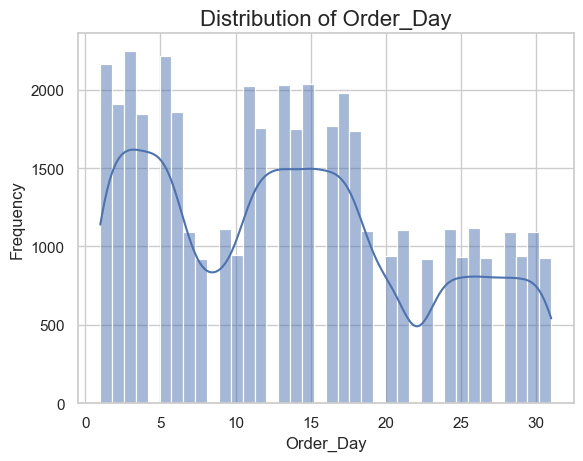

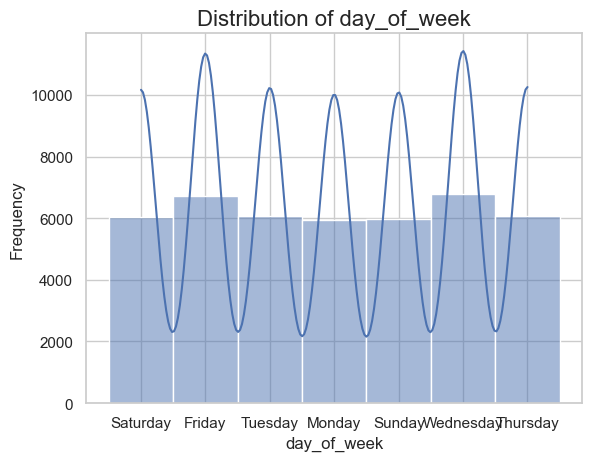

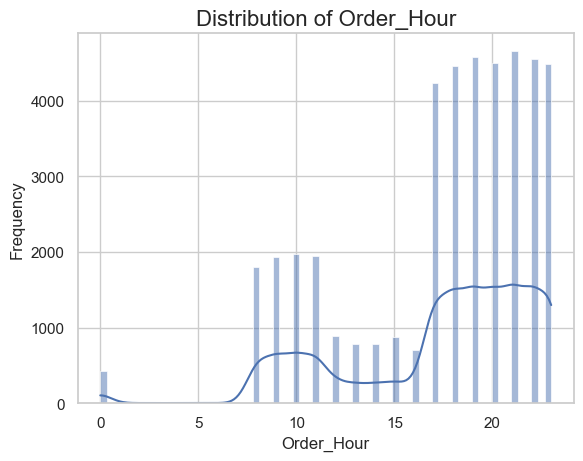

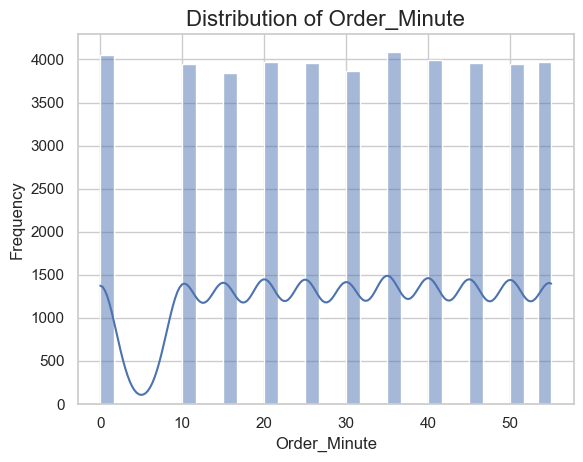

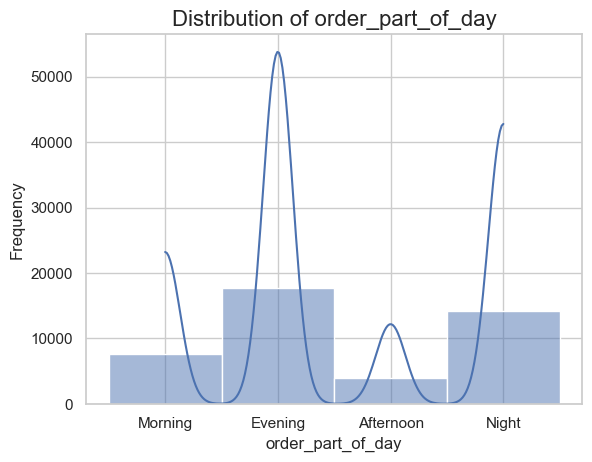

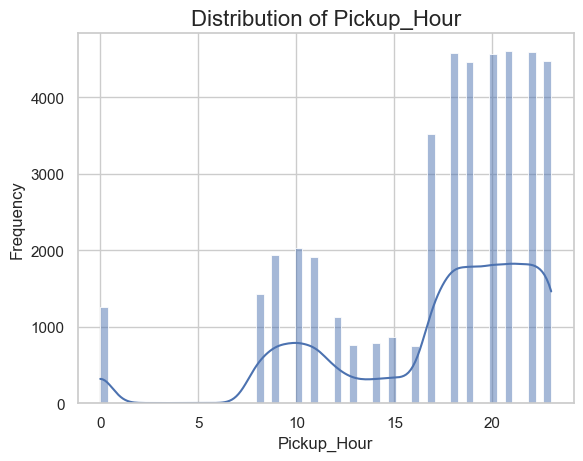

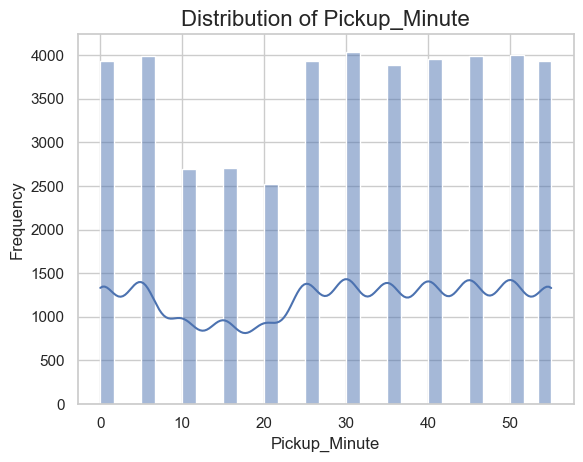

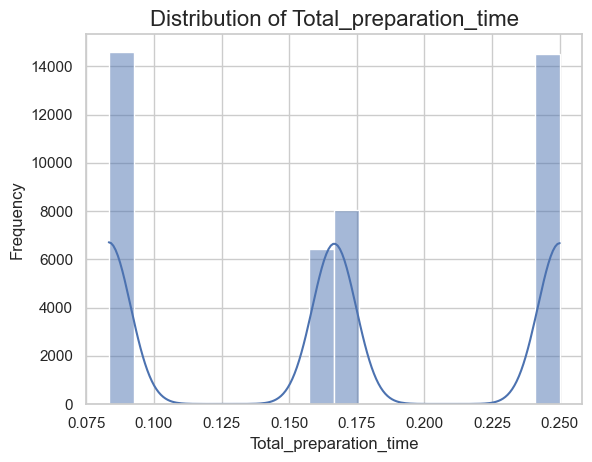

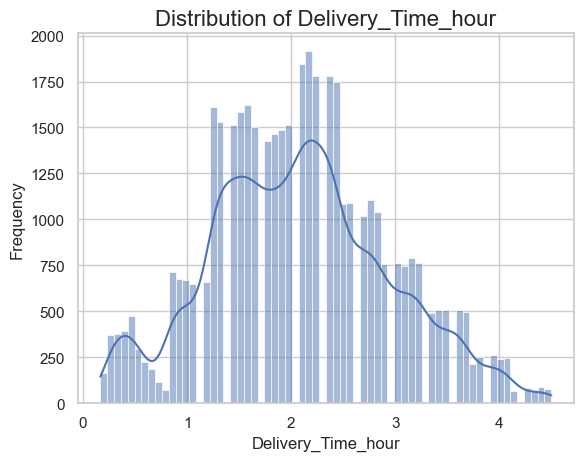

In [48]:
sns.set_theme(style='whitegrid')

for col in df_capped:
    plt.Figure(figsize=(10,6))
    sns.histplot(df_capped[col],kde=True)
    plt.title(f'Distribution of {col}',fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [49]:
df_capped.describe()

,Agent_Age,Agent_Rating,Distance_km,Order_Year,Order_Month,Order_Day,Order_Hour,Order_Minute,Pickup_Hour,Pickup_Minute,Total_preparation_time,Delivery_Time_hour
count,43594.000000,43594.000000,43594.000000,43594.0,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,9.793503,2022.0,2.981052,13.811763,17.424737,29.547529,17.152498,28.621485,0.166518,2.081941
std,5.760689,0.313827,5.688475,0.0,0.545886,8.712240,4.818828,16.611268,5.319094,17.557371,0.068109,0.865700
min,20.000000,2.500000,1.465067,2022.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.166667
25%,25.000000,4.500000,4.663432,2022.0,3.000000,6.000000,15.000000,15.000000,14.000000,15.000000,0.083333,1.500000
50%,30.000000,4.700000,9.220419,2022.0,3.000000,13.000000,19.000000,30.000000,19.000000,30.000000,0.166667,2.083333
75%,35.000000,4.900000,13.682165,2022.0,3.000000,20.000000,21.000000,45.000000,21.000000,45.000000,0.250000,2.666667
max,39.000000,5.000000,27.210263,2022.0,4.000000,31.000000,23.000000,55.000000,23.000000,55.000000,0.250000,4.500000


In [50]:
df_capped

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Category,Distance_km,Order_Year,Order_Month,Order_Day,day_of_week,Order_Hour,Order_Minute,order_part_of_day,Pickup_Hour,Pickup_Minute,Total_preparation_time,Delivery_Time_hour
0,37,4.9,Sunny,High,motorcycle,Urban,Clothing,3.025149,2022,3,19,Saturday,11,30,Morning,11,45,0.250000,2.000000
1,34,4.5,Stormy,Jam,scooter,Metropolitian,Electronics,20.183530,2022,3,25,Friday,19,45,Evening,19,50,0.083333,2.750000
2,23,4.4,Sandstorms,Low,motorcycle,Urban,Sports,1.552758,2022,3,19,Saturday,8,30,Morning,8,45,0.250000,2.166667
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,Cosmetics,7.790401,2022,4,5,Tuesday,18,0,Evening,18,10,0.166667,1.750000
4,32,4.6,Cloudy,High,scooter,Metropolitian,Toys,6.210138,2022,3,26,Saturday,13,30,Afternoon,13,45,0.250000,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,30,4.8,Windy,High,motorcycle,Metropolitian,Home,1.489846,2022,3,24,Thursday,11,35,Morning,11,45,0.166667,2.666667
43735,21,4.6,Windy,Jam,motorcycle,Metropolitian,Jewelry,11.007735,2022,2,16,Wednesday,19,55,Evening,20,10,0.250000,3.000000
43736,30,4.9,Cloudy,Low,scooter,Metropolitian,Home,4.657195,2022,3,11,Friday,23,50,Night,0,5,0.250000,1.333333
43737,20,4.7,Cloudy,High,motorcycle,Metropolitian,Kitchen,6.232393,2022,3,7,Monday,13,35,Afternoon,13,40,0.083333,2.166667


In [51]:
df_capped[cat]

,Weather,Traffic,Vehicle,Area,Category,day_of_week,order_part_of_day
0,Sunny,High,motorcycle,Urban,Clothing,Saturday,Morning
1,Stormy,Jam,scooter,Metropolitian,Electronics,Friday,Evening
2,Sandstorms,Low,motorcycle,Urban,Sports,Saturday,Morning
3,Sunny,Medium,motorcycle,Metropolitian,Cosmetics,Tuesday,Evening
4,Cloudy,High,scooter,Metropolitian,Toys,Saturday,Afternoon
...,...,...,...,...,...,...,...
43734,Windy,High,motorcycle,Metropolitian,Home,Thursday,Morning
43735,Windy,Jam,motorcycle,Metropolitian,Jewelry,Wednesday,Evening
43736,Cloudy,Low,scooter,Metropolitian,Home,Friday,Night
43737,Cloudy,High,motorcycle,Metropolitian,Kitchen,Monday,Afternoon


In [52]:
from sklearn.preprocessing import OrdinalEncoder
traffic_order = ['Low', 'Medium', 'High', 'Jam']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
part_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']

ordinal_encoder_traffic = OrdinalEncoder(categories=[traffic_order], dtype=int, handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_encoder_day = OrdinalEncoder(categories=[day_order], dtype=int, handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_encoder_part_of_day = OrdinalEncoder(categories=[part_of_day_order], dtype=int, handle_unknown='use_encoded_value', unknown_value=-1)

df_capped['Traffic_encoded'] = ordinal_encoder_traffic.fit_transform(df_capped[['Traffic']])
df_capped['day_of_week_encoded'] = ordinal_encoder_day.fit_transform(df_capped[['day_of_week']])
df_capped['order_part_of_day_encoded'] = ordinal_encoder_part_of_day.fit_transform(df_capped[['order_part_of_day']])


cols_to_drop = ['Traffic', 'day_of_week', 'order_part_of_day']
df_capped = df_capped.drop(columns=cols_to_drop)


In [53]:
df_capped

,Agent_Age,Agent_Rating,Weather,Vehicle,Area,Category,Distance_km,Order_Year,Order_Month,Order_Day,Order_Hour,Order_Minute,Pickup_Hour,Pickup_Minute,Total_preparation_time,Delivery_Time_hour,Traffic_encoded,day_of_week_encoded,order_part_of_day_encoded
0,37,4.9,Sunny,motorcycle,Urban,Clothing,3.025149,2022,3,19,11,30,11,45,0.250000,2.000000,-1,5,0
1,34,4.5,Stormy,scooter,Metropolitian,Electronics,20.183530,2022,3,25,19,45,19,50,0.083333,2.750000,-1,4,2
2,23,4.4,Sandstorms,motorcycle,Urban,Sports,1.552758,2022,3,19,8,30,8,45,0.250000,2.166667,-1,5,0
3,38,4.7,Sunny,motorcycle,Metropolitian,Cosmetics,7.790401,2022,4,5,18,0,18,10,0.166667,1.750000,-1,1,2
4,32,4.6,Cloudy,scooter,Metropolitian,Toys,6.210138,2022,3,26,13,30,13,45,0.250000,2.500000,-1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,30,4.8,Windy,motorcycle,Metropolitian,Home,1.489846,2022,3,24,11,35,11,45,0.166667,2.666667,-1,3,0
43735,21,4.6,Windy,motorcycle,Metropolitian,Jewelry,11.007735,2022,2,16,19,55,20,10,0.250000,3.000000,-1,2,2
43736,30,4.9,Cloudy,scooter,Metropolitian,Home,4.657195,2022,3,11,23,50,0,5,0.250000,1.333333,-1,4,3
43737,20,4.7,Cloudy,motorcycle,Metropolitian,Kitchen,6.232393,2022,3,7,13,35,13,40,0.083333,2.166667,-1,0,1


In [54]:
X = df_capped.drop(columns='Delivery_Time_hour')
y = df_capped['Delivery_Time_hour']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.preprocessing import TargetEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
nominal_cols = ['Weather', 'Category','Area','Vehicle']
numeric_cols=['Agent_Age','Agent_Rating','Distance_km','Order_Month','Order_Day','Order_Hour','Order_Minute','Pickup_Hour','Pickup_Minute','Total_preparation_time']
target_encoder = TargetEncoder(target_type='continuous')
scaler=StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        
        ('target_encoder', target_encoder, nominal_cols),
        
        ('scaler', scaler, numeric_cols) 
    ],
    remainder='passthrough' 
)





In [57]:
X_train_encoded = preprocessor.fit_transform(X_train, y_train)
X_test_encoded=X_test_encoded = preprocessor.transform(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [59]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_encoded, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_encoded)
    y_test_pred = model.predict(X_test_encoded)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5901
- Mean Absolute Error: 0.4648
- R2 Score: 0.5376
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5923
- Mean Absolute Error: 0.4671
- R2 Score: 0.5262


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.8679
- Mean Absolute Error: 0.6931
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8606
- Mean Absolute Error: 0.6884
- R2 Score: -0.0002


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5901
- Mean Absolute Error: 0.4648
- R2 Score: 0.5376
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5923
- Mean Absolute Error: 0.4671
- R2 Score: 0.5262


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5236
- Mean Absolute Error: 0.4050
- R2 Score: 0.6361
----------------------

In [61]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.811081
5,Random Forest Regressor,0.806776
6,XGBRegressor,0.801204
8,AdaBoost Regressor,0.652717
4,Decision Tree,0.627039
2,Ridge,0.526206
0,Linear Regression,0.526203
3,K-Neighbors Regressor,0.434841
1,Lasso,-0.000229


In [62]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train_encoded, y_train)
y_pred = lin_model.predict(X_test_encoded)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 52.62


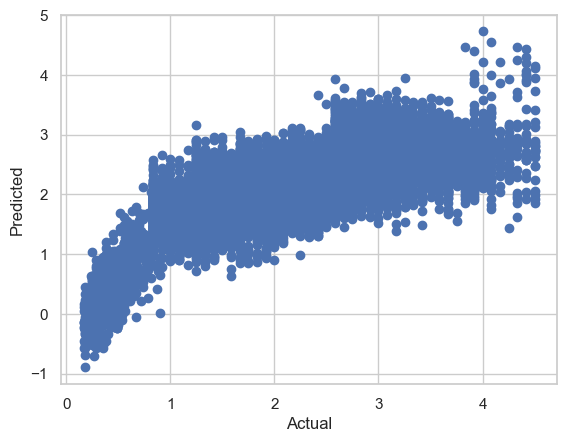

In [63]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

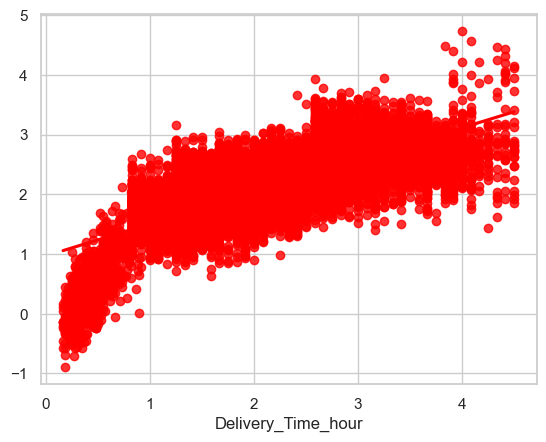

In [64]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [65]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
3895,4.083333,2.100944,1.982389
12728,1.500000,1.603611,-0.103611
42887,1.833333,2.063757,-0.230423
2353,1.250000,1.862546,-0.612546
27421,2.416667,1.401677,1.014990
...,...,...,...
2949,2.416667,2.562423,-0.145756
36528,0.333333,-0.049925,0.383259
346,1.250000,1.464625,-0.214625
21301,2.250000,2.503901,-0.253901


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# best_model = RandomForestRegressor(random_state=42, n_estimators=100)
# best_model.fit(X_train_encoded, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# def predict_new_delivery():
#     print("--- Please Enter New Order Details ---")
    
#     # 1. Collect Nominal Inputs (as text)
#     weather = input("Enter Weather (e.g., Sunny, Stormy, Cloudy): ")
#     category = input("Enter Category (e.g., Electronics, Clothing): ")
#     area = input("Enter Area (e.g., Metropolitan, Urban): ")
#     vehicle = input("Enter Vehicle (e.g., motorcycle, scooter): ")
    
#     # 2. Collect Numeric Inputs (as numbers)
#     age = float(input("Enter Agent Age (e.g., 30): "))
#     rating = float(input("Enter Agent Rating (e.g., 4.5): "))
#     distance = float(input("Enter Distance_km (e.g., 8.5): "))
#     month = int(input("Enter Order_Month (1-12): "))
#     day = int(input("Enter Order_Day (1-31): "))
#     year = int(input("Enter Order_Year (e.g., 2022): ")) # <-- ADDED
#     order_hr = int(input("Enter Order_Hour (0-23): "))
#     order_min = int(input("Enter Order_Minute (0-59): "))
#     pickup_hr = int(input("Enter Pickup_Hour (0-23): "))
#     pickup_min = int(input("Enter Pickup_Minute (0-59): "))
#     prep_time = float(input("Enter Total_preparation_time (in hours, e.g., 0.25): "))
    
#     # 3. Collect Ordinal Inputs (as the encoded numbers)
#     print("\n--- Enter Encoded Values (from Cell 52) ---")
#     traffic = int(input("Enter Traffic (0=Low, 1=Medium, 2=High, 3=Jam): "))
#     day_week = int(input("Enter day_of_week (0=Monday, 1=Tuesday, ... 6=Sunday): "))
#     part_day = int(input("Enter order_part_of_day (0=Morning, 1=Afternoon, 2=Evening, 3=Night): "))
    
#     # 4. Create the DataFrame
#     # All inputs are put into a dictionary
#     new_data = {
#         'Weather': [weather],
#         'Category': [category],
#         'Area': [area],
#         'Vehicle': [vehicle],
#         'Agent_Age': [age],
#         'Agent_Rating': [rating],
#         'Distance_km': [distance],
#         'Order_Month': [month],
#         'Order_Day': [day],
#         'Order_Year': [year], # <-- ADDED
#         'Order_Hour': [order_hr],
#         'Order_Minute': [order_min],
#         'Pickup_Hour': [pickup_hr],
#         'Pickup_Minute': [pickup_min],
#         'Total_preparation_time': [prep_time],
#         'Traffic_encoded': [traffic],
#         'day_of_week_encoded': [day_week],
#         'order_part_of_day_encoded': [part_day]
#     }
    
#     new_df = pd.DataFrame(new_data)
    
#     # Ensure column order matches the model's training data
#     try:
#         new_df = new_df[X_train.columns]
#     except Exception as e:
#         print(f"Error: Could not reorder columns. Make sure X_train exists. {e}")
#         return

#     # 5. Transform and Predict
#     print("\nProcessing...\n")
#     try:
#         # Use the *existing* preprocessor
#         new_data_encoded = preprocessor.transform(new_df)
        
#         # Use the *existing* best_model
#         prediction_hours = best_model.predict(new_data_encoded)[0]
#         prediction_minutes = prediction_hours * 60
        
#         print(f"--- PREDICTION ---")
#         print(f"Predicted Delivery Time: {prediction_hours:.2f} hours")
#         print(f"Predicted Delivery Time: {prediction_minutes:.2f} minutes")
        
#     except Exception as e:
#         print(f"An error occurred during prediction: {e}")
#         print("Please ensure 'preprocessor' and 'best_model' are trained.")

In [ ]:
# predict_new_delivery()

--- Please Enter New Order Details ---

--- Enter Encoded Values (from Cell 52) ---

Processing...

--- PREDICTION ---
Predicted Delivery Time: 2.23 hours
Predicted Delivery Time: 133.65 minutes
